In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dx, dy = 0.1, 0.1
N = 50
x = np.linspace(0, 20, N)
y = np.linspace(0, 20, N)


In [19]:
def initialize_temperature():
    T = np.zeros((N, N))
    T[-1,:] = 0  
    T[:,-1] = 0  
    T[0,:] = 0  
    T[:,0] = 10 
    
    return T

In [20]:
T_matrix = initialize_temperature()

In [21]:
def update_temperature(T, omega=0.7, max_iter=10000, tol=1e-3):
    dmax = tol + 1  
    it = 0
    
    while dmax > tol and it < max_iter:
        dmax = 0
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                Tij = (dy**2 * (T[i+1,j] + T[i-1,j]) + dx**2 * (T[i,j+1] + T[i,j-1])) / (2*(dx**2 + dy**2))
                r = omega * (Tij - T[i,j])
                T[i,j] += r
                dmax = max(dmax, abs(r))
        it += 1
    
    return T, it

In [22]:
T_final, iterations = update_temperature(T_matrix)

<IPython.core.display.Javascript object>


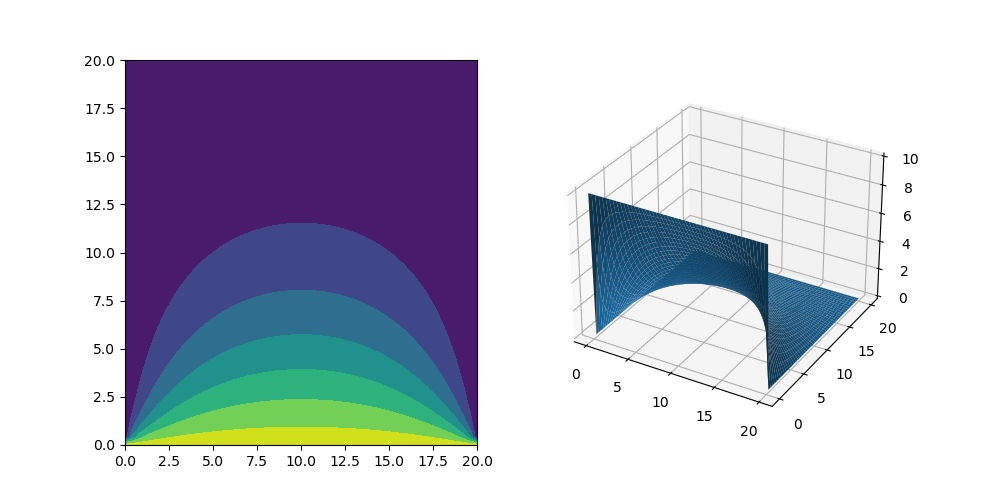

In [23]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

X, Y = np.meshgrid(x, y)
c = ax1.contourf(X, Y, T_final.T)
ax2.plot_surface(X, Y, T_final.T)

plt.show()